### Importing Useful Libraries

In [3]:
#pip install seaborn

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

# Importing Deep Learning Libraries

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

### Loading Images From Folder

In [8]:
picture_size = 48
folder_path = "/Users/Precious/Desktop/Face Image Recognition/Emotion Detection/images/"

#DesktopFace Image RecognitionEmotion Detectionimages

#/Users/Precious/Desktop/Face Image Recognition/Emotion Detection/images/

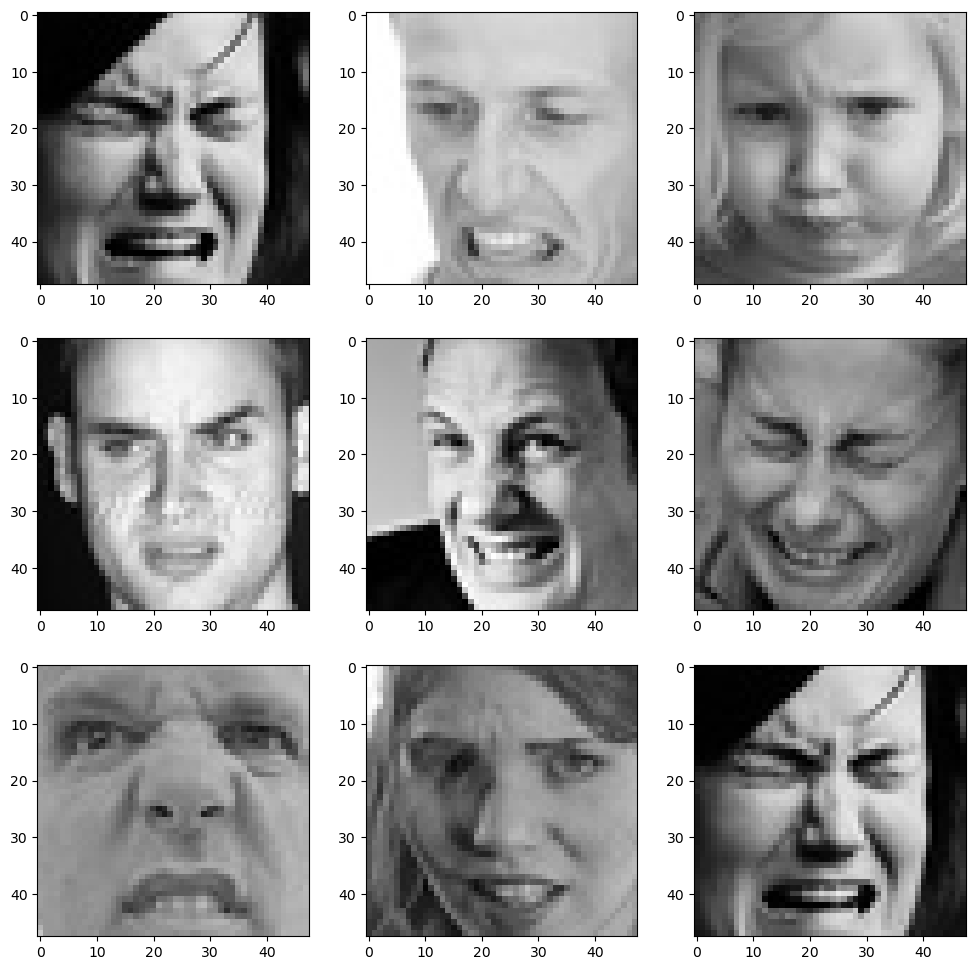

In [9]:
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

### Training and Validation Data Stage

In [10]:
batch_size  = 128

train_datagenerator = ImageDataGenerator()
val_datagenerator = ImageDataGenerator()

train_set = train_datagenerator.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = val_datagenerator.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


###  Building Model

In [11]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

### Fitting the Model using Training and Validation Data 

In [12]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [13]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

C:\Users\Precious\AppData\Local\Temp\ipykernel_21248\3853974908.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


Epoch 1/48
225/225 [==============================] - ETA: 0s - loss: 1.7497 - accuracy: 0.3322WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1567s 7s/step - loss: 1.7497 - accuracy: 0.3322 - val_loss: 1.7512 - val_accuracy: 0.4009 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 1.4072 - accuracy: 0.4622WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1409s 6s/step - loss: 1.4072 - accuracy: 0.4622 - val_loss: 1.4214 - val_accuracy: 0.4540 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 1.2649 - accuracy: 0.5193WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1337s 6s/step - loss: 1.2649 - accuracy: 0.5193 - val_loss: 1.2392 - val_accuracy: 0.5223 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - ETA: 0s - loss: 1.1755 - accuracy: 0.5515WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1261s 6s/step - loss: 1.1755 - accuracy: 0.5515 - val_loss: 1.2336 - val_accuracy: 0.5148 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - ETA: 0s - loss: 1.1180 - accuracy: 0.5722WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1290s 6s/step - loss: 1.1180 - accuracy: 0.5722 - val_loss: 1.3392 - val_accuracy: 0.4733 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - ETA: 0s - loss: 1.0707 - accuracy: 0.5953WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1322s 6s/step - loss: 1.0707 - accuracy: 0.5953 - val_loss: 1.2100 - val_accuracy: 0.5494 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - ETA: 0s - loss: 1.0173 - accuracy: 0.6154WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1222s 5s/step - loss: 1.0173 - accuracy: 0.6154 - val_loss: 1.2980 - val_accuracy: 0.5196 - lr: 0.0010
Epoch 8/48
225/225 [==============================] - ETA: 0s - loss: 0.9827 - accuracy: 0.6296WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1209s 5s/step - loss: 0.9827 - accuracy: 0.6296 - val_loss: 1.1076 - val_accuracy: 0.5817 - lr: 0.0010
Epoch 9/48
225/225 [==============================] - ETA: 0s - loss: 0.9386 - accuracy: 0.6459WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1654s 7s/step - loss: 0.9386 - accuracy: 0.6459 - val_loss: 1.0867 - val_accuracy: 0.5857 - lr: 0.0010
Epoch 10/48
225/225 [==============================] - ETA: 0s - loss: 0.8977 - accuracy: 0.6597WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1491s 7s/step - loss: 0.8977 - accuracy: 0.6597 - val_loss: 1.0683 - val_accuracy: 0.6016 - lr: 0.0010
Epoch 11/48
225/225 [==============================] - ETA: 0s - loss: 0.8508 - accuracy: 0.6826WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1511s 7s/step - loss: 0.8508 - accuracy: 0.6826 - val_loss: 1.2110 - val_accuracy: 0.5516 - lr: 0.0010
Epoch 12/48
225/225 [==============================] - ETA: 0s - loss: 0.8116 - accuracy: 0.6952WARNING:tensorflow:Can save best model only with val_acc available, skipping.


225/225 [==============================] - 1471s 7s/step - loss: 0.8116 - accuracy: 0.6952 - val_loss: 1.1642 - val_accuracy: 0.5729 - lr: 0.0010
Epoch 13/48
225/225 [==============================] - ETA: 0s - loss: 0.7720 - accuracy: 0.7098Restoring model weights from the end of the best epoch: 10.



Epoch 13: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
225/225 [==============================] - 1756s 8s/step - loss: 0.7720 - accuracy: 0.7098 - val_loss: 1.0736 - val_accuracy: 0.6065 - lr: 0.0010
Epoch 13: early stopping


### Plotting Model's Accuracy & Loss

╒══════════╤════════════╤══════════════╕
│ Metric   │   Training │   Validation │
╞══════════╪════════════╪══════════════╡
│ Accuracy │   0.709755 │     0.606534 │
├──────────┼────────────┼──────────────┤
│ Loss     │   0.772    │     1.07358  │
╘══════════╧════════════╧══════════════╛


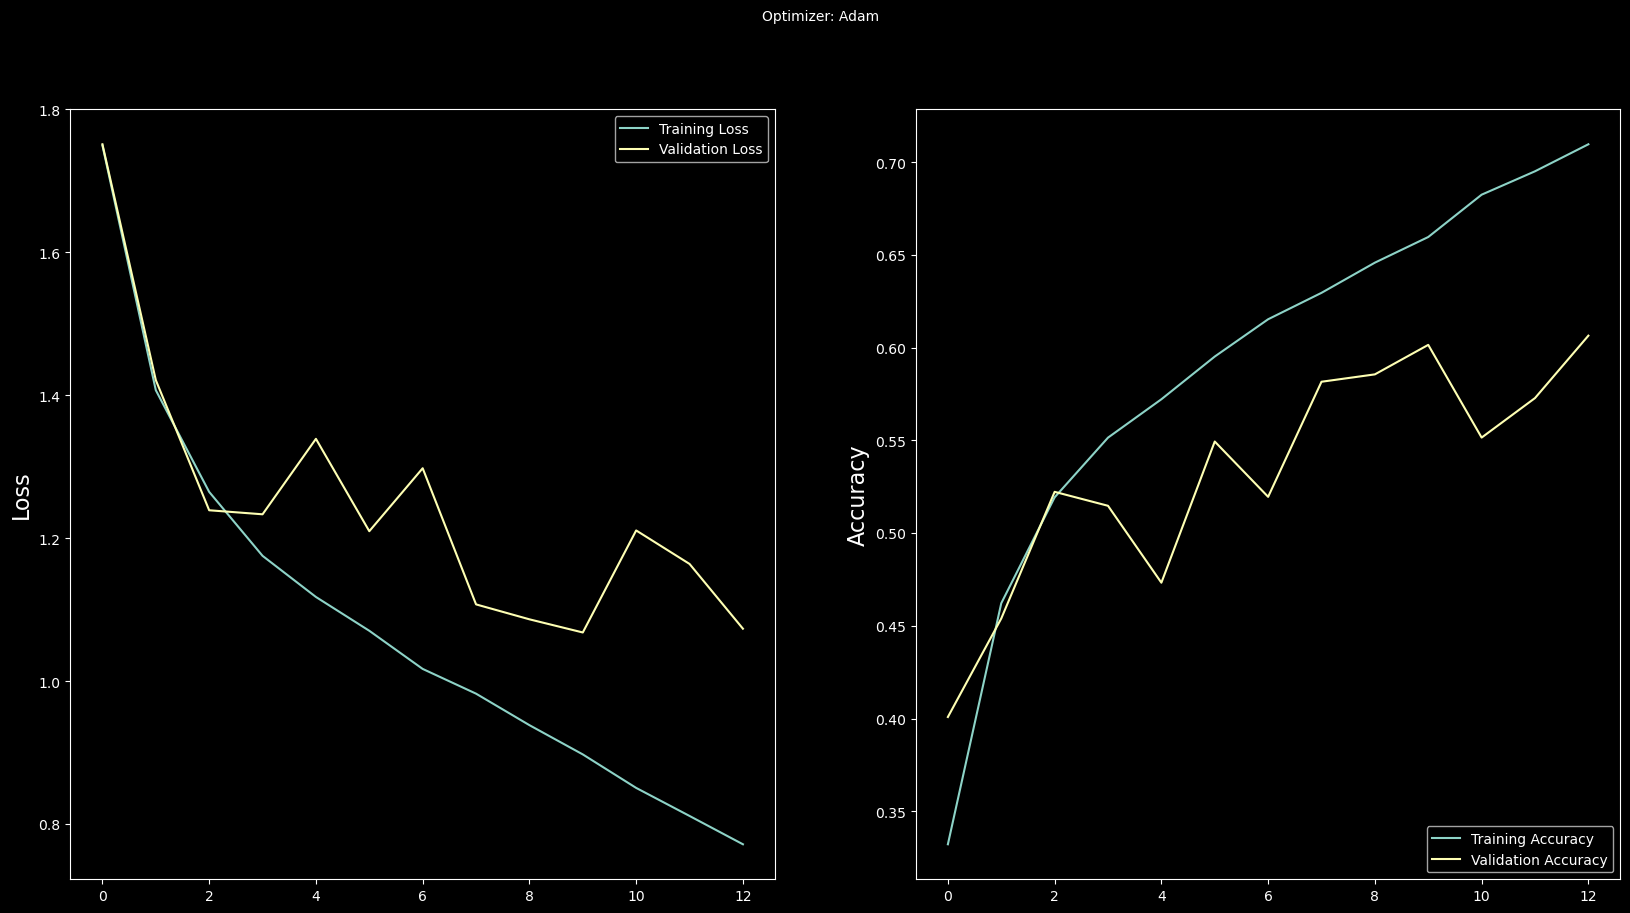

In [26]:
import matplotlib.pyplot as plt
from tabulate import tabulate

# Define data for the table
table_data = [["Metric", "Training", "Validation"]]
table_data.append(["Accuracy", history.history['accuracy'][-1], history.history['val_accuracy'][-1]])
table_data.append(["Loss", history.history['loss'][-1], history.history['val_loss'][-1]])

# Print the table
table = tabulate(table_data, headers="firstrow", tablefmt="fancy_grid")
print(table)

# Creating the plot
plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer: Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()
